In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
np.random.seed(123)
pima_column_names = ['times_pregnant', 'plasma_glucose_concentration', 'diastolic_blood_pressure', 'triceps_thickness', 'serum_insulin', 'bmi', 'pedigree_function', 'age', 'onset_diabetes']
pima = pd.read_csv('pima-indians-diabetes.csv', names=pima_column_names)

In [3]:
pima.head()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# null accuracy
pima['onset_diabetes'].value_counts()

0    500
1    268
Name: onset_diabetes, dtype: int64

In [5]:
pima['onset_diabetes'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: onset_diabetes, dtype: float64

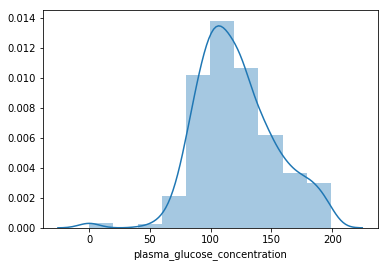

In [6]:
sns.distplot(pima['plasma_glucose_concentration'],kde=True, bins=10)

(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <a list of 10 Patch objects>)

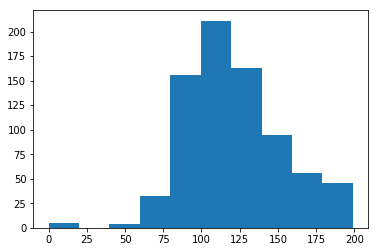

In [7]:
plt.hist(pima['plasma_glucose_concentration'],bins=10)
#plt.legend(loc='upper right')

Text(0.5,1,'Histogram of plasma_glucose_concentration')

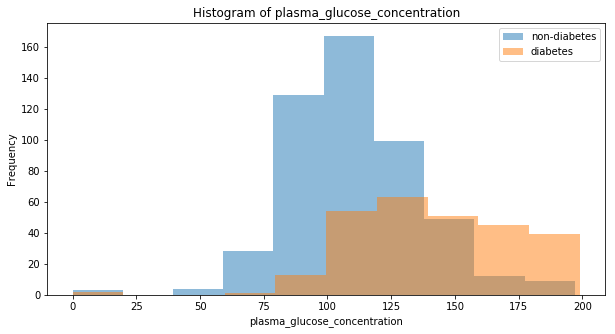

In [8]:
col = 'plasma_glucose_concentration'
plt.figure(figsize=(10,5))
plt.hist(pima[pima['onset_diabetes']==0][col], 10, alpha=0.5, label='non-diabetes')
plt.hist(pima[pima['onset_diabetes']==1][col], 10, alpha=0.5, label='diabetes')
plt.legend(loc='upper right')
plt.xlabel(col)
plt.ylabel('Frequency')
plt.title('Histogram of {}'.format(col))

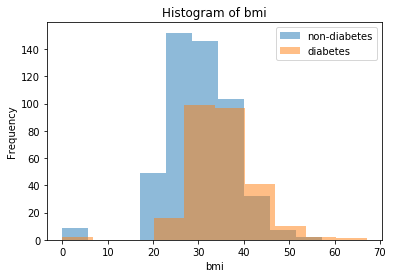

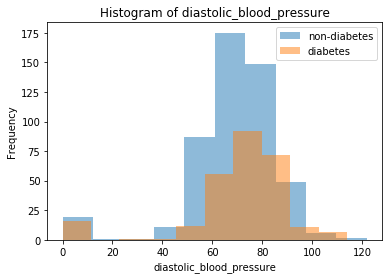

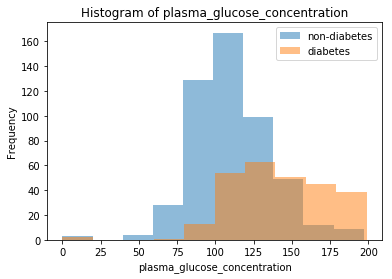

In [9]:
for col in ['bmi', 'diastolic_blood_pressure', 'plasma_glucose_concentration']:
    plt.hist(pima[pima['onset_diabetes']==0][col], 10, alpha=0.5, label='non-diabetes')
    plt.hist(pima[pima['onset_diabetes']==1][col], 10, alpha=0.5, label='diabetes')
    plt.legend(loc='upper right')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title('Histogram of {}'.format(col))
    plt.show()

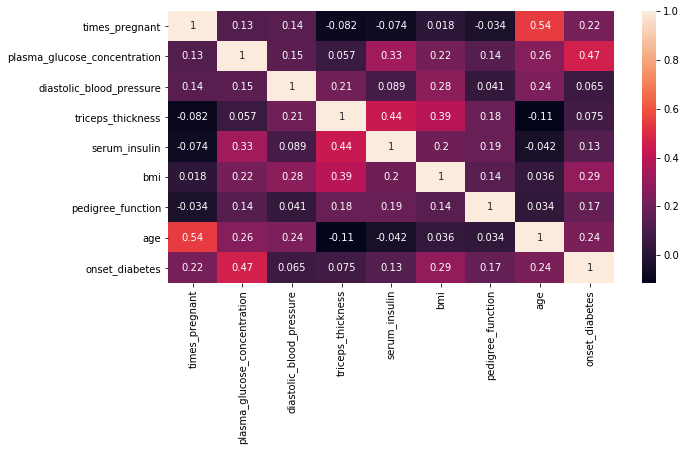

In [10]:
plt.figure(figsize=(10,5))
sns.heatmap(pima.corr(), annot=True)

In [11]:
pima.corr()['onset_diabetes'] 

times_pregnant                  0.221898
plasma_glucose_concentration    0.466581
diastolic_blood_pressure        0.065068
triceps_thickness               0.074752
serum_insulin                   0.130548
bmi                             0.292695
pedigree_function               0.173844
age                             0.238356
onset_diabetes                  1.000000
Name: onset_diabetes, dtype: float64

In [12]:
pima.isnull().sum()

times_pregnant                  0
plasma_glucose_concentration    0
diastolic_blood_pressure        0
triceps_thickness               0
serum_insulin                   0
bmi                             0
pedigree_function               0
age                             0
onset_diabetes                  0
dtype: int64

In [13]:
pima.shape

(768, 9)

In [14]:
pima.describe()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [15]:
pima.describe().T

,count,mean,std,min,25%,50%,75%,max
times_pregnant,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
plasma_glucose_concentration,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
diastolic_blood_pressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
triceps_thickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
serum_insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
bmi,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedigree_function,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
onset_diabetes,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [16]:
pima.columns

Index(['times_pregnant', 'plasma_glucose_concentration',
       'diastolic_blood_pressure', 'triceps_thickness', 'serum_insulin', 'bmi',
       'pedigree_function', 'age', 'onset_diabetes'],
      dtype='object')

In [17]:
columns = ['plasma_glucose_concentration','diastolic_blood_pressure', 'triceps_thickness', 'serum_insulin', 'bmi']

In [18]:
for cols in columns:
    pima[cols].replace(0, np.NaN, inplace=True)

In [19]:
pima.head()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [20]:
pima.isnull().sum()

times_pregnant                    0
plasma_glucose_concentration      5
diastolic_blood_pressure         35
triceps_thickness               227
serum_insulin                   374
bmi                              11
pedigree_function                 0
age                               0
onset_diabetes                    0
dtype: int64

In [21]:
pima.describe().T

,count,mean,std,min,25%,50%,75%,max
times_pregnant,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
plasma_glucose_concentration,763.0,121.686763,30.535641,44.000,99.00000,117.0000,141.00000,199.00
diastolic_blood_pressure,733.0,72.405184,12.382158,24.000,64.00000,72.0000,80.00000,122.00
triceps_thickness,541.0,29.153420,10.476982,7.000,22.00000,29.0000,36.00000,99.00
serum_insulin,394.0,155.548223,118.775855,14.000,76.25000,125.0000,190.00000,846.00
bmi,757.0,32.457464,6.924988,18.200,27.50000,32.3000,36.60000,67.10
pedigree_function,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
onset_diabetes,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [22]:
# drop the rows with missing values
pima_dropped = pima.dropna()

In [23]:
pima_dropped.shape

(392, 9)

In [24]:
#loss in dara
round((pima.shape[0] -  pima_dropped.shape[0])/float(pima.shape[0]) * 100)

49

In [25]:
# some EDA of the dataset before it was dropped and after

# split of trues and falses before rows dropped
pima['onset_diabetes'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: onset_diabetes, dtype: float64

In [26]:
pima_dropped['onset_diabetes'].value_counts(normalize=True)

0    0.668367
1    0.331633
Name: onset_diabetes, dtype: float64

In [27]:
pima_dropped.head()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1


In [28]:
# the mean values of each column (excluding missing values)
pima.mean()

times_pregnant                    3.845052
plasma_glucose_concentration    121.686763
diastolic_blood_pressure         72.405184
triceps_thickness                29.153420
serum_insulin                   155.548223
bmi                              32.457464
pedigree_function                 0.471876
age                              33.240885
onset_diabetes                    0.348958
dtype: float64

In [29]:
# the mean values of each column (with missing values rows dropped)
pima_dropped.mean()

times_pregnant                    3.301020
plasma_glucose_concentration    122.627551
diastolic_blood_pressure         70.663265
triceps_thickness                29.145408
serum_insulin                   156.056122
bmi                              33.086224
pedigree_function                 0.523046
age                              30.864796
onset_diabetes                    0.331633
dtype: float64

In [30]:
# % change in means
abs((pima_dropped.mean() - pima.mean()) / pima.mean()*100)

times_pregnant                  14.148877
plasma_glucose_concentration     0.773123
diastolic_blood_pressure         2.405793
triceps_thickness                0.027480
serum_insulin                    0.326522
bmi                              1.937184
pedigree_function               10.843862
age                              7.148093
onset_diabetes                   4.964971
dtype: float64

Text(0,0.5,'% change')

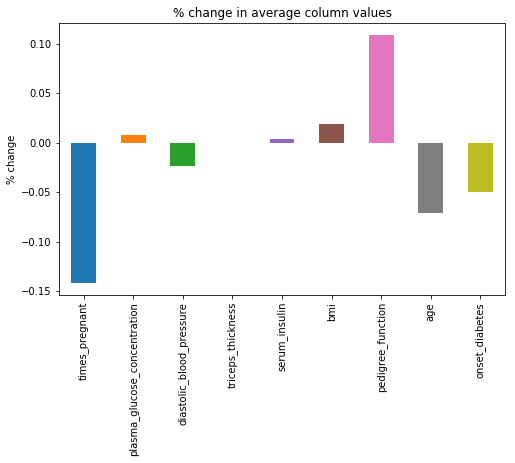

In [31]:
# % change in means as a bar chart
plt.figure(figsize=(8,5))
ax = ((pima_dropped.mean() - pima.mean()) / pima.mean()).plot(kind='bar', title='% change in average column values')
ax.set_ylabel('% change')

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [33]:
# now lets do some machine learning

# note we are using the dataset with the dropped rows

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

X_dropped = pima_dropped.drop('onset_diabetes', axis=1)
# create our feature matrix by removing the response variable
print("learning from {} rows".format(X_dropped.shape[0]))
y_dropped = pima_dropped['onset_diabetes']


# our grid search variables and instances

# KNN parameters to try
#knn_params = {'n_neighbors':[1, 2, 3, 4, 5, 6, 7]}
knn_params = {'n_neighbors':range(1,31)}

knn = KNeighborsClassifier()  # instantiate a KNN model

grid = GridSearchCV(knn, knn_params, scoring='accuracy')
grid.fit(X_dropped, y_dropped)

print("best modelwith dropped data:  " ,grid.best_score_, grid.best_params_)
print("null accuracy is : ", 0.651042)
# but we are learning from way fewer rows..

learning from 392 rows
best modelwith dropped data:   0.7525510204081632 {'n_neighbors': 25}
null accuracy is :  0.651042


In [34]:
#pima[pima['plasma_glucose_concentration'].isnull()].index
#Int64Index([75, 182, 342, 349, 502], dtype='int64')
empty_plasma_index = pima[pima['plasma_glucose_concentration'].isnull()].index
pima.loc[empty_plasma_index]['plasma_glucose_concentration']

75    NaN
182   NaN
342   NaN
349   NaN
502   NaN
Name: plasma_glucose_concentration, dtype: float64

In [35]:
#pima['plasma_glucose_concentration'].fillna(pima['plasma_glucose_concentration'].mean(), inplace=True)
# fill the column's missing values with the mean of the rest of the column
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy='mean')
pima_imputed = imputer.fit_transform(pima)

In [36]:
type(pima_imputed)  # comes out as an array

numpy.ndarray

In [37]:
pima_imputed = pd.DataFrame(pima_imputed, columns=pima_column_names)
# turn our numpy array back into a pandas DataFrame object

In [38]:
pima_imputed.head()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
0,6.0,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,1.0


In [39]:
pima_imputed.isnull().sum() 

times_pregnant                  0
plasma_glucose_concentration    0
diastolic_blood_pressure        0
triceps_thickness               0
serum_insulin                   0
bmi                             0
pedigree_function               0
age                             0
onset_diabetes                  0
dtype: int64

In [40]:
pima_zero = pima.fillna(0) # impute values with 0

X_zero = pima_zero.drop('onset_diabetes', axis=1)
print( "learning from {} rows".format(X_zero.shape[0]))
y_zero = pima_zero['onset_diabetes']

#knn_params = {'n_neighbors':[1, 2, 3, 4, 5, 6, 7]}
knn_params = {'n_neighbors':range(1,31)}
grid = GridSearchCV(knn, knn_params)
grid.fit(X_zero, y_zero)

print("result after imputing with zero:  ",grid.best_score_, grid.best_params_ )
print("null accuracy is : ", 0.651042)
# if the values stayed at 0, our accuracy goes down
#If we had left the values as 0, our accuracy would have been lower than dropping the rows with missing values. Our goal now is 
#to obtain a machine learning pipeline that can learn from all 768 rows, but can perform better than the model that learned from 
#only 392 rows. This means that the accuracy to beat is 0.752, or 75.2%.

learning from 768 rows
result after imputing with zero:   0.7552083333333334 {'n_neighbors': 8}
null accuracy is :  0.651042


In [41]:
from sklearn.pipeline import Pipeline

#knn_params = {'classify__n_neighbors':[1, 2, 3, 4, 5, 6, 7]}
knn_params = {'classify__n_neighbors':range(1,31)}
# must redefine params to fit the pipeline

knn = KNeighborsClassifier()  # instantiate a KNN model

mean_impute = Pipeline([('imputer', Imputer(strategy='mean')), ('classify', knn)])

X = pima.drop('onset_diabetes', axis=1)
y = pima['onset_diabetes']

grid = GridSearchCV(mean_impute, knn_params)
grid.fit(X, y)

print('Result after inputing with mean: ',grid.best_score_, grid.best_params_)

Result after inputing with mean:  0.7421875 {'classify__n_neighbors': 8}


In [42]:
strategy = ['mean', 'median']
for str in strategy:
    knn_params = {'classify__n_neighbors':range(1,31)}
    # must redefine params to fit the pipeline

    knn = KNeighborsClassifier()  # instantiate a KNN model

    mean_impute = Pipeline([('imputer', Imputer(strategy=str)), ('classify', knn)])

    X = pima.drop('onset_diabetes', axis=1)
    y = pima['onset_diabetes']

    grid = GridSearchCV(mean_impute, knn_params)
    grid.fit(X, y)

    print(f'Result after inputing with {str}: ',grid.best_score_, grid.best_params_)

Result after inputing with mean:  0.7421875 {'classify__n_neighbors': 8}
Result after inputing with median:  0.7395833333333334 {'classify__n_neighbors': 8}


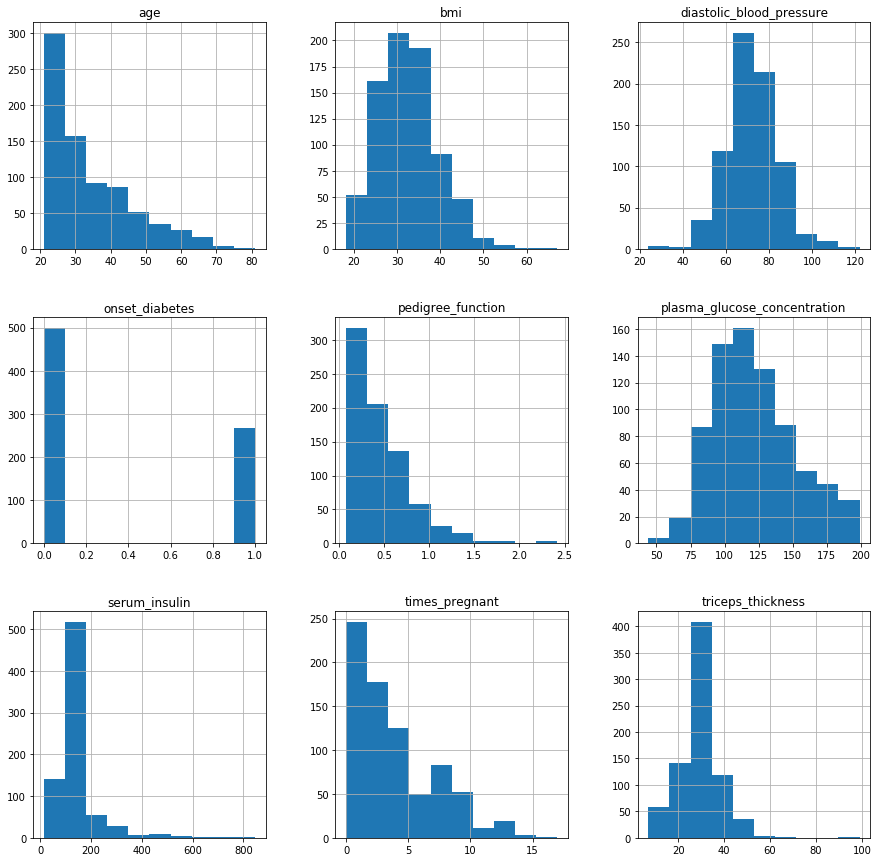

In [43]:
# histogram of pima imputed with mean
a=pima_imputed.hist(figsize=(15,15))

In [44]:
pima_imputed.describe().T

,count,mean,std,min,25%,50%,75%,max
times_pregnant,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.000000,17.00
plasma_glucose_concentration,768.0,121.686763,30.435949,44.000,99.75000,117.000000,140.250000,199.00
diastolic_blood_pressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.000000,122.00
triceps_thickness,768.0,29.153420,8.790942,7.000,25.00000,29.153420,32.000000,99.00
serum_insulin,768.0,155.548223,85.021108,14.000,121.50000,155.548223,155.548223,846.00
bmi,768.0,32.457464,6.875151,18.200,27.50000,32.400000,36.600000,67.10
pedigree_function,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.626250,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.000000,81.00
onset_diabetes,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.000000,1.00


In [45]:
# built in z-score normalizer
pima_imputed_mean = pima_imputed.copy()
from sklearn.preprocessing import StandardScaler
scale = StandardScaler() # instantiate a z-scaler object
pima_imputed_mean_scaled = pd.DataFrame(scale.fit_transform(pima_imputed_mean), columns=pima_column_names)

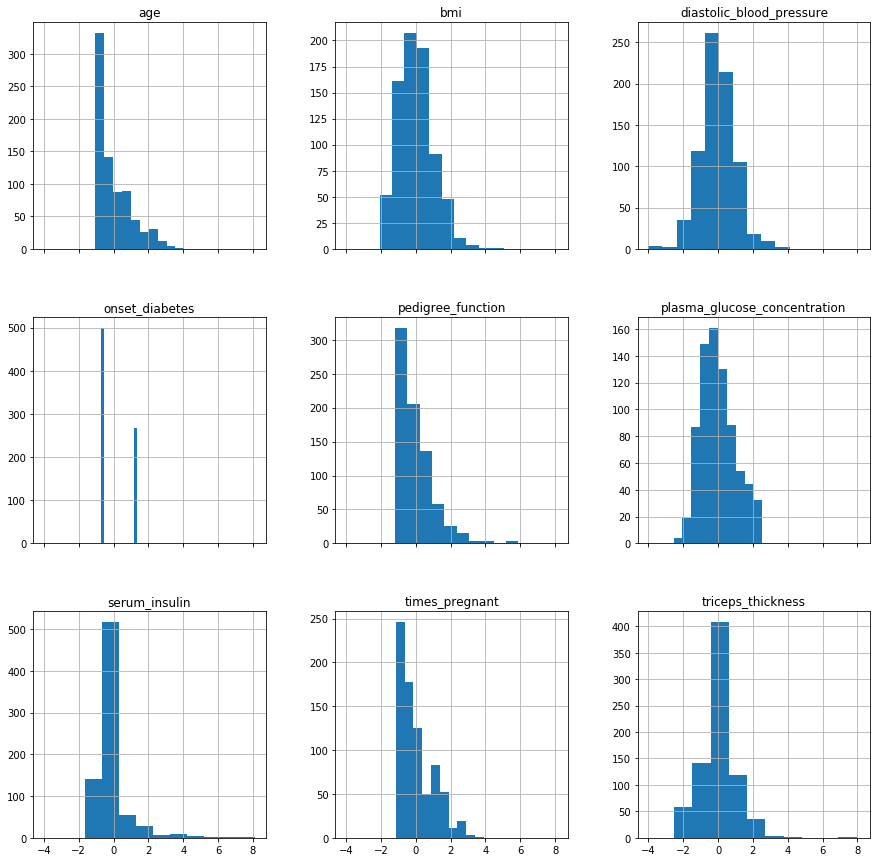

In [46]:
pims = pima_imputed_mean_scaled.hist(figsize=(15, 15), sharex=True)

In [47]:
knn_params = {'imputer__strategy':['mean', 'median'], 'classify__n_neighbors':range(1,31)}

mean_impute_standardize = Pipeline([('imputer', Imputer()), ('standardize', StandardScaler()), ('classify', knn)])
X = pima.drop('onset_diabetes', axis=1)
y = pima['onset_diabetes']

grid = GridSearchCV(mean_impute_standardize, knn_params)
grid.fit(X, y)

print('best model with z-score adn mean/median: ', grid.best_score_, grid.best_params_)

best model with z-score adn mean/median:  0.7682291666666666 {'classify__n_neighbors': 22, 'imputer__strategy': 'median'}


In [48]:
knn_params = {'imputer__strategy':['mean', 'median'], 'classify__n_neighbors':range(1,31)}

mean_impute_standardize = Pipeline([('imputer', Imputer()), ('standardize', StandardScaler()), ('classify', knn)])
X = pima.drop('onset_diabetes', axis=1)
y = pima['onset_diabetes']

grid = GridSearchCV(mean_impute_standardize, knn_params,cv=10)
grid.fit(X, y)

print('best model with z-score adn mean/median and cv=10: ', grid.best_score_, grid.best_params_)

best model with z-score adn mean/median and cv=10:  0.7747395833333334 {'classify__n_neighbors': 27, 'imputer__strategy': 'mean'}


In [49]:
# import the sklearn module
from sklearn.preprocessing import MinMaxScaler

#instantiate the class
min_max = MinMaxScaler()

# apply the Min Max Scaling
pima_min_maxed = pd.DataFrame(min_max.fit_transform(pima_imputed), columns=pima_column_names)

# spit out some descriptive statistics
pima_min_maxed.describe().T

,count,mean,std,min,25%,50%,75%,max
times_pregnant,768.0,0.226180,0.198210,0.0,0.058824,0.176471,0.352941,1.0
plasma_glucose_concentration,768.0,0.501205,0.196361,0.0,0.359677,0.470968,0.620968,1.0
diastolic_blood_pressure,768.0,0.493930,0.123432,0.0,0.408163,0.491863,0.571429,1.0
triceps_thickness,768.0,0.240798,0.095554,0.0,0.195652,0.240798,0.271739,1.0
serum_insulin,768.0,0.170130,0.102189,0.0,0.129207,0.170130,0.170130,1.0
bmi,768.0,0.291564,0.140596,0.0,0.190184,0.290389,0.376278,1.0
pedigree_function,768.0,0.168179,0.141473,0.0,0.070773,0.125747,0.234095,1.0
age,768.0,0.204015,0.196004,0.0,0.050000,0.133333,0.333333,1.0
onset_diabetes,768.0,0.348958,0.476951,0.0,0.000000,0.000000,1.000000,1.0


In [50]:
knn_params = {'imputer__strategy':['mean', 'median'], 'classify__n_neighbors':range(1,31)}

mean_impute_standardize_min_max = Pipeline([('imputer', Imputer()), ('standardize', MinMaxScaler()), ('classify', knn)])
X = pima.drop('onset_diabetes', axis=1)
y = pima['onset_diabetes']

grid = GridSearchCV(mean_impute_standardize_min_max, knn_params)
grid.fit(X, y)

print('best model with z-score adn mean/median: ', grid.best_score_, grid.best_params_)

best model with z-score adn mean/median:  0.7578125 {'classify__n_neighbors': 23, 'imputer__strategy': 'mean'}


In [51]:
knn_params = {'imputer__strategy':['mean', 'median'], 'classify__n_neighbors':range(1,31)}

mean_impute_standardize_min_max = Pipeline([('imputer', Imputer()), ('standardize', MinMaxScaler()), ('classify', knn)])
X = pima.drop('onset_diabetes', axis=1)
y = pima['onset_diabetes']

grid = GridSearchCV(mean_impute_standardize_min_max, knn_params,cv=10)
grid.fit(X, y)

print('best model with z-score adn mean/median and cv=10: ', grid.best_score_, grid.best_params_)

best model with z-score adn mean/median and cv=10:  0.7786458333333334 {'classify__n_neighbors': 23, 'imputer__strategy': 'mean'}


In [52]:
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import  StandardScaler
class Custoscaler(TransformerMixin, BaseEstimator):
    def __init__(self, scaler='MinMaxScaler'):
        self.scaler = scaler
        
    def transform(self, df):
        X = df.copy()
        
        if self.scaler == 'StandardScaler':
            scale = StandardScaler()
            X = scale.fit_transform(X)
        if self.scaler == 'MinMaxScaler':
            scale = MinMaxScaler()
            X = scale.fit_transform(X)
        return X
    
    def fit(self, *_):
        return self

In [58]:
knn_params = {'imputer__strategy':['mean', 'median'], 
              'Custoscaler__scaler':['MinMaxScaler', 'StandardScaler'], 'classify__n_neighbors':range(1,31)}

In [61]:
mean_impute_standardize_all = Pipeline([('imputer', Imputer()), ('Custoscaler', Custoscaler()), ('classify', knn)])
X = pima.drop('onset_diabetes', axis=1)
y = pima['onset_diabetes']

grid = GridSearchCV(mean_impute_standardize_all, knn_params, cv=10)
grid.fit(X, y)

print('best model with z-score/min_max adn mean/median and cv=10: ', grid.best_score_, grid.best_params_)

best model with z-score/min_max adn mean/median and cv=10:  0.7734375 {'Custoscaler__scaler': 'StandardScaler', 'classify__n_neighbors': 17, 'imputer__strategy': 'median'}


In [57]:
#grid.cv_results_